In [265]:
from matplotlib import pyplot as mplt
import pandas as pd
import numpy as np

## Import and set up data

Missing data is coded at -99

A correct answer to a question is 1

An incorrect answer to a question is 0

Create a column for each task that has a correct answer and code accordingly

In [266]:
data = pd.read_csv("w209_userresearch_results.csv")

In [267]:
challenge_scales = [
    'v1_t1_challenge',
    'v1_t2_challenge',
    'v1_t3_challenge',
    'v2_t1_challenge',
    'v2_t2_challenge',
    'v2_t3_challenge',
    'v2_t4_challenge',
    'v2_t5_challenge', 
    'v3_t1_challenge',
    'v3_t2_challenge', 
    'v3_t3_challenge', 
    'v3_t4_challenge', 
]

view1_correct = [
    'sp_most_correct',
    'sp_least_correct',
    'bh_most_correct',
    'bh_least_correct',
    's_most_correct', 
    's_least_correct',
    'v_most_correct', 
    'v_least_correct',
    'ts_correct',
    'pop_category_correct',
    'city_fewest_orders_correct', 
]

sus_scale = [
    'sus_2', 
    'sus_3', 
    'sus_4',
    'sus_5', 
    'sus_6', 
    'sus_7', 
    'sus_8', 
    'sus_9', 
    'sus_10'
]

sus_labels = [
    "Unnecessarily complex",
    "Easy to use",
    "Need extra support",
    "Well integrated functions",
    "Inconsistent system",
    "Learn quickly",
    "Cumbersome",
    "Confident",
    "Need to learn a lot first"
]

demos = [
    'age', 
    'gender', 
    'race'
]

overall_rating = 'overall_rating'

In [268]:
allusers_challenge_data = data[challenge_scales]
allusers_correct_data = data[view1_correct]
allusers_sus_data = data[sus_scale]
allusers_demos_data = data[demos]
allusers_overall_data = data[overall_rating]

## Define plotting functions

In [269]:
def likert_plot(scale, x_tick, y_lab=[""], y_tick=[1], title="", legend=["1","2","3","4","5"], reverse=False):
    likert_colors = [
        "#bdc3c7", #Silver Sand Grey
        "#5333ed", #Royal Blue
        "#86e2d5", #Riptide Blue
        "#fde3a7", #Cape Honey Neutral
        "#f15a22", #Flamingo Red
        "#d91e18" #Thunderbird Red
    ]
    
    if reverse:
        likert_colors = [
        "#bdc3c7", #Silver Sand Grey
        "#d91e18", #Thunderbird Red
        "#f15a22", #Flamingo Red
        "#fde3a7", #Cape Honey Neutral
        "#86e2d5", #Riptide Blue
        "#5333ed", #Royal Blue
        ]
    
    fig = mplt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.barh(1, scale[scale == -99].count(), color=likert_colors[0])
    lefts = scale[scale == -99].count()

    ax.barh(1, scale[scale == 1].count(), color=likert_colors[1], left=lefts)
    lefts = lefts + scale[scale == 1].count()

    ax.barh(1, scale[scale == 2].count(), color=likert_colors[2], left=lefts)
    lefts = lefts + scale[scale == 2].count()

    ax.barh(1, scale[scale == 3].count(), color=likert_colors[3], left=lefts)
    lefts = lefts + scale[scale == 3].count()

    ax.barh(1, scale[scale == 4].count(), color=likert_colors[4], left=lefts)
    lefts = lefts + scale[scale == 4].count()

    ax.barh(1, scale[scale == 5].count(), color=likert_colors[5], left=lefts)
    lefts = lefts + scale[scale == 5].count()
    
    ax.legend(legend)
    ax.set_yticks(y_tick)
    ax.set_xticks(x_tick)
    ax.set_yticklabels(y_lab)
    
    mplt.title(title)
    
    return fig

def repeated_likert_plot(scale, x_tick,  y_tick, y_lab, title, legend=["1","2","3","4","5"], reverse=False):
    likert_colors = [
        "#bdc3c7", #Silver Sand Grey
        "#5333ed", #Royal Blue
        "#86e2d5", #Riptide Blue
        "#fde3a7", #Cape Honey Neutral
        "#f15a22", #Flamingo Red
        "#d91e18" #Thunderbird Red
    ]
    
    if reverse:
        likert_colors = [
        "#bdc3c7", #Silver Sand Grey
        "#d91e18", #Thunderbird Red
        "#f15a22", #Flamingo Red
        "#fde3a7", #Cape Honey Neutral
        "#86e2d5", #Riptide Blue
        "#5333ed", #Royal Blue
    ]
    
    fig = mplt.figure()
    ax = fig.add_subplot(1,1,1)
    
    for i,col in zip(range(0, len(scale.columns)), scale.columns):
        ax.barh(i, scale[scale == -99][col].count(), color=likert_colors[0])
        lefts = scale[scale == -99][col].count()
        
        ax.barh(i, scale[scale == 1][col].count(), color=likert_colors[1], left=lefts)
        lefts = lefts + scale[scale == 1][col].count()

        ax.barh(i, scale[scale == 2][col].count(), color=likert_colors[2], left=lefts)
        lefts = lefts + scale[scale == 2][col].count()

        ax.barh(i, scale[scale == 3][col].count(), color=likert_colors[3], left=lefts)
        lefts = lefts + scale[scale == 3][col].count()

        ax.barh(i, scale[scale == 4][col].count(), color=likert_colors[4], left=lefts)
        lefts = lefts + scale[scale == 4][col].count()

        ax.barh(i, scale[scale == 5][col].count(), color=likert_colors[5], left=lefts)
        lefts = lefts + scale[scale == 5][col].count()
    
    mplt.title(title)
    ax.legend(legend)
    ax.set_yticks(y_tick)
    ax.set_xticks(x_tick)
    ax.set_yticklabels(y_lab)
    
    return fig

def plot_correct(scale, x_tick,  y_tick, y_lab, title, legend=["Missing","Incorrect","Correct"], reverse=False):
    colors = [
        "#bdc3c7", #Silver Sand Grey
        "#5333ed", #Royal Blue
        "#d91e18" #Thunderbird Red
    ]
    
    fig = mplt.figure()
    ax = fig.add_subplot(1,1,1)
    
    for i,col in zip(range(0, len(scale.columns)), scale.columns):
        ax.barh(i, scale[scale == -99][col].count(), color=colors[0])
        lefts = scale[scale == -99][col].count()
        
        ax.barh(i, scale[scale == 0][col].count(), color=colors[2], left=lefts)
        lefts = lefts + scale[scale == 0][col].count()

        ax.barh(i, scale[scale == 1][col].count(), color=colors[1], left=lefts)
        lefts = lefts + scale[scale == 1][col].count()
    
    mplt.title(title)
    ax.legend(legend)
    ax.set_yticks(y_tick)
    ax.set_xticks(x_tick)
    ax.set_yticklabels(y_lab)
    
    return fig

## Challenge Ratings

Mean of V1T1 Challenge: 2.60
Mean of V1T2 Challenge: 3.00
Mean of V1T3 Challenge: 2.67


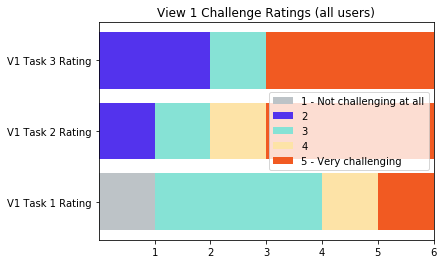

In [270]:
print("Mean of V1T1 Challenge: %.2f" %np.nanmean(allusers_challenge_data['v1_t1_challenge'].replace(-99, np.nan)))

print("Mean of V1T2 Challenge: %.2f" %np.mean(allusers_challenge_data['v1_t2_challenge'].replace(-99, np.nan)))

print("Mean of V1T3 Challenge: %.2f" %np.mean(allusers_challenge_data['v1_t3_challenge'].replace(-99, np.nan)))

challenge_ratings = repeated_likert_plot(allusers_challenge_data,
                             legend=["1 - Not challenging at all","2","3","4","5 - Very challenging"],
                             x_tick=[1,2,3,4,5,6],
                             y_tick=[0,1,2],
                             y_lab=[
                                 "V1 Task 1 Rating",
                                 "V1 Task 2 Rating",
                                 "V1 Task 3 Rating",
                                 "'v2_t1_challenge',
'v2_t2_challenge',
'v2_t3_challenge',
'v2_t4_challenge',
'v2_t5_challenge', 
'v3_t1_challenge',
'v3_t2_challenge', 
'v3_t3_challenge', 
'v3_t4_challenge', "
                             ],
                             title="View 1 Challenge Ratings (all users)")

## Overall Rating

Mean of Overall Rating: 3.20


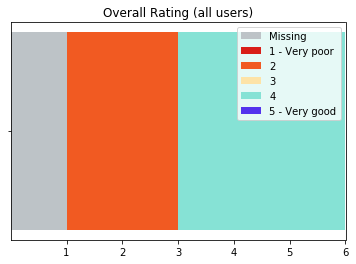

In [271]:
print("Mean of Overall Rating: %.2f" %np.mean(allusers_overall_data.replace(-99, np.nan)))

overall = likert_plot(allusers_overall_data,
                             legend=["Missing","1 - Very poor","2","3","4","5 - Very good"],
                             x_tick=[1,2,3,4,5,6],
                             y_lab=[""],
                             title="Overall Rating (all users)",
                             reverse=True)

## System Usability Scale

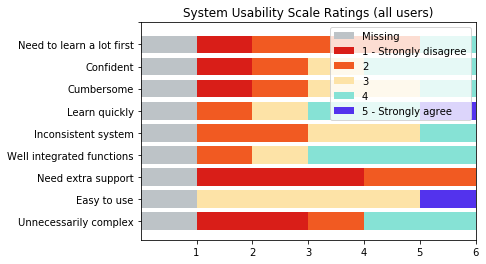

In [272]:
sus_chart = repeated_likert_plot(allusers_sus_data,
                    legend=["Missing","1 - Strongly disagree","2","3","4","5 - Strongly agree"],
                    x_tick=[1,2,3,4,5,6],
                    y_tick=[0,1,2,3,4,5,6,7,8,9],
                    y_lab=sus_labels,
                    title="System Usability Scale Ratings (all users)",
                    reverse=True)

In [258]:
allusers_sus_data

,sus_2,sus_3,sus_4,sus_5,sus_6,sus_7,sus_8,sus_9,sus_10
0,1,5,1,4,2,4,1,4,4
1,1,3,1,4,3,4,2,4,1
2,-99,-99,-99,-99,-99,-99,-99,-99,-99
3,2,3,2,2,3,5,3,2,2
4,4,3,2,3,4,3,4,3,2
5,4,3,1,4,2,2,3,1,2


In [282]:
reverse_score = [
    'sus_2',  
    'sus_4',
    'sus_6',  
    'sus_8', 
    'sus_10'
]

allusers_sus_data = allusers_sus_data.replace(-99, np.nan)

def reverseScoring(df, high, cols):
    temp = df.copy()
    temp[cols] = high - df[cols]
    return temp

sus_rev = reverseScoring(allusers_sus_data, 6, reverse_score)

sus_rev

,sus_2,sus_3,sus_4,sus_5,sus_6,sus_7,sus_8,sus_9,sus_10
0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0
1,5.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,3.0,4.0,2.0,3.0,5.0,3.0,2.0,4.0
4,2.0,3.0,4.0,3.0,2.0,3.0,2.0,3.0,4.0
5,2.0,3.0,5.0,4.0,4.0,2.0,3.0,1.0,4.0


In [283]:
total_score = []

for i in range(0, 6):
    total_score.append(sum(sus_rev.iloc[i]))
    
print("Mean score of SUS: %.2f / 45" %np.nanmean(total_score))

Mean score of SUS: 31.80 / 45


,0
0,38.0
1,37.0
2,NaN
3,30.0
4,26.0
5,28.0


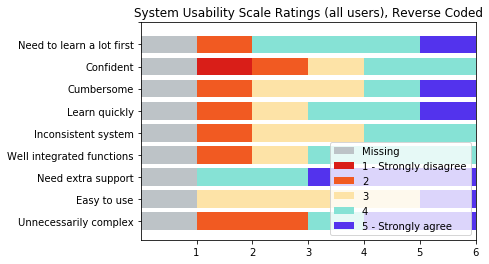

In [284]:
sus_rev = sus_rev.replace(np.nan, -99)

sus_chart = repeated_likert_plot(sus_rev,
                    legend=["Missing","1 - Strongly disagree","2","3","4","5 - Strongly agree"],
                    x_tick=[1,2,3,4,5,6],
                    y_tick=[0,1,2,3,4,5,6,7,8,9],
                    y_lab=sus_labels,
                    title="System Usability Scale Ratings (all users), Reverse Coded",
                    reverse=True)

pd.DataFrame(total_score)

## View 1 Tasks Correct

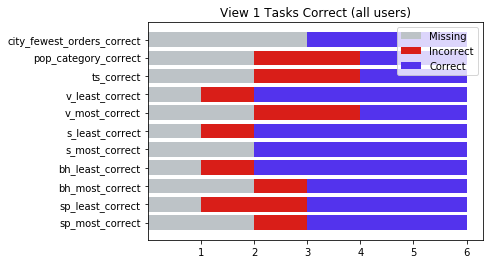

In [261]:
plot = plot_correct(allusers_correct_data,
            x_tick=[1,2,3,4,5,6],
            y_tick=[0,1,2,3,4,5,6,7,8,9,10],
            y_lab=allusers_correct_data.columns,
            title="View 1 Tasks Correct (all users)")

In [263]:
counts = []

for i in range(0, 6):
    counts.append([
        allusers_correct_data.iloc[i][allusers_correct_data.iloc[i] == -99].count(),
        allusers_correct_data.iloc[i][allusers_correct_data.iloc[i] == 0].count(),
        allusers_correct_data.iloc[i][allusers_correct_data.iloc[i] == 1].count()
    ])

df_counts = pd.DataFrame(counts, columns=["Missing", "Incorrect", "Correct"])

total_correct = sum(df_counts["Correct"])
total_incorrect = sum(df_counts["Incorrect"])
total_missing = sum(df_counts["Missing"])

total_tasks_user = len(view1_correct)
total_tasks_completed = total_tasks_user*6-sum(df_counts["Missing"])

per_correct = total_correct/total_tasks_completed
per_incorrect = total_incorrect/total_tasks_completed

completion_rate = total_tasks_completed/(total_tasks_user*6)

print("Number Correct: %i" %total_correct)
print("Number Incorrect: %i" %total_incorrect)
print("Number Missing: %i \n" %total_missing)

print("Total number of tasks per user: %i" %total_tasks_user)
print("Total number of tasks completed: %i \n" %total_tasks_completed)

print("Percent Correct: %.2f" %per_correct)
print("Percent Incorrect %.2f \n" %per_incorrect)

print("Task Completion Rate: %.2f" %completion_rate)

Number Correct: 34
Number Incorrect: 13
Number Missing: 19 

Total number of tasks per user: 11
Total number of tasks completed: 47 

Percent Correct: 0.72
Percent Incorrect 0.28 

Task Completion Rate: 0.71


## Appendix A.

In [63]:
columns = ['Timestamp', 
           'id',
           'consent',
           'Tell me about this view.',
           'v1_t1_challenge',
           'Task 1 Additional Comments', 
           '1. Sao Paulo', 
           'sp_most_correct',
           'sp_least_correct', 
           '2. Belo Horizonte', 
           'bh_most_correct',
           'bh_least_correct', 
           '3. Salvador', 
           's_most_correct', 
           's_least_correct',
           '4. Vitoria', 
           'v_most_correct', 
           'v_least_correct', 
           'v1_t2_challenge',
           'Task 2 Additional Comments', 
           'What day did the spike occur on?',
           'What were the total sales on that day? ', 
           'ts_correct',
           'What was the most popular item category?', 
           'pop_category_correct',
           'Which city had the fewest number of orders that day?',
           'city_fewest_orders_correct', 
           'v1_t3_challenge',
           'Task 3 Additional Comments', 
           'Tell me about this view',
           'v2_t1_challenge',
           'You are creating sales report for December 2017. Identify the number of orders for three different product categories',
           'v2_t2_challenge',
           'You need to decide one a product category to discontinue. Identify the product category with the least amount of orders for the latest month.',
           'v2_t3_challenge',
           'You want to bring in more tech products. Tell me how the tech product category is doing?',
           'v2_t4_challenge',
           'In anticipation of the upcoming holiday season, you want to learn more about the trends last year. Tell me about the 2017 holiday season.',
           'v2_t5_challenge', 
           'View 2 Additional Comments',
           'Tell me about the view? ', 
           'v3_t1_challenge', 
           'Additional comments',
           'Additional comments.1',
           'What is the range of average order processing time across all the states? ',
           'Which state has the worst average? What is the value?',
           'Which state has the best average? What is the value?',
           'What is the order processing time for MG and AM?',
           'Which states have an out of range average processing time? ',
           'v3_t2_challenge', 
           'Additional Comments',
           'What is the range of average order processing time across all product categories? ',
           'Which product category ships the fastest? Which one is the slowest?',
           'What is the average delivery time for office furniture and home appliances?',
           'Which product categories need more attention i.e. have an out of range processing time? ',
           'v3_t3_challenge', 
           'Additional Comments.1',
           'Which 2-3 products ship the slowest in the 3 lowest performing states? ',
           'Which 2-3 products ship the slowest in the 2 highest performing states? ',
           'Is there an outlier category that has bad delivery times in almost all the states? Which one is it? ',
           'Is there a wide variation in delivery times of product categories among states? ',
           'v3_t4_challenge', 
           'Additional Comments.2', 
           'sus_2', 
           'sus_3', 
           'sus_4',
           'sus_5', 
           'sus_6', 
           'sus_7', 
           'sus_8', 
           'sus_9', 
           'sus_10',
           'What are your overall thoughts on the tool?',
           'Were there any tasks you found particularly challenging or non-intuitive? Please tell me more about those and any ideas for improvement you may have.',
           'Were there any tasks you found particularly easy to perform? Please tell me more about those and why they were easier? ',
           'Do you have any other suggestions or comments?', 
           'overall_rating',
           'age', 
           'gender', 
           'race', 
           'Additional Notes and Observations'
          ]